In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 5)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


In [3]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [79]:
def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (30,22)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
       
        pval = myTrunc(pval,6)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(29,24.5, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    

In [5]:
prot_hnscc = hnscc.get_proteomics()
prot_gbm = brain.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = colon.get_proteomics()
prot_brca = brca.get_proteomics()
prot_luad = luad.get_proteomics()
prot_ovar = Ovar.get_proteomics()
prot_ccrcc = ccrcc.get_proteomics()


In [37]:
prot_brca


#prot_brca.columns = prot_brca.columns.droplevel(1)

filter_col = [col for col in prot_hnscc if col.startswith("CCL9")]
filter_col

[]

False

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


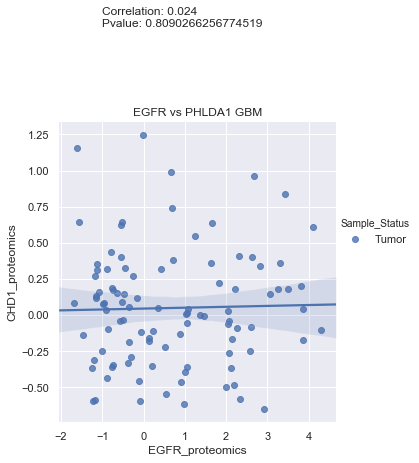

In [45]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CHD1","EGFR","F3","MMP1"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","CHD1_proteomics", "Sample_Status",title = "EGFR vs PHLDA1 GBM", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


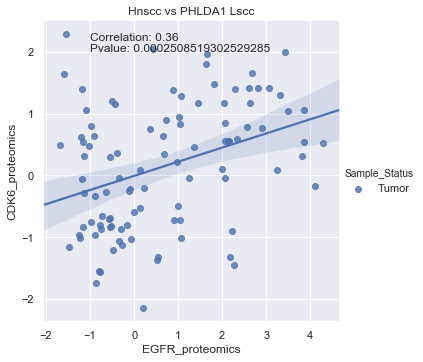

In [35]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CDK6","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","CDK6_proteomics", "Sample_Status",title = "Hnscc vs PHLDA1 Lscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


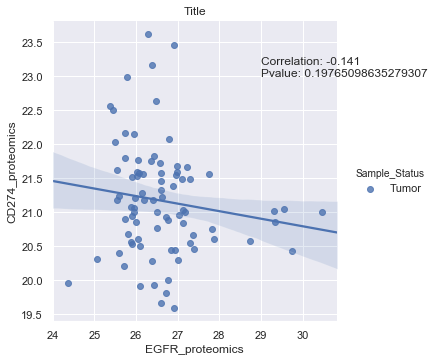

In [20]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD274","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
 
df1
plot_lin_regression(df1,"EGFR_proteomics","CD274_proteomics", "Sample_Status", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


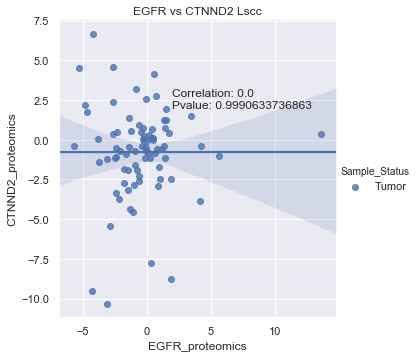

In [19]:
df1 = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CTNND2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CTNND2_proteomics", "Sample_Status",title = "EGFR vs CTNND2 Lscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


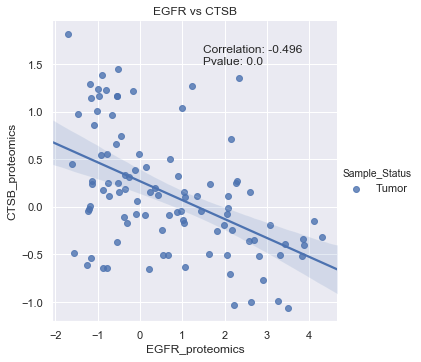

In [63]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CTSB","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CTSB_proteomics", "Sample_Status",title = "EGFR vs CTSB", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


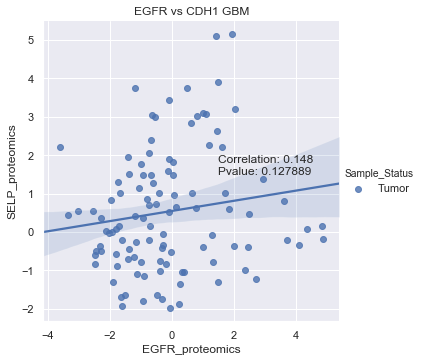

In [287]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["SELP","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","SELP_proteomics", "Sample_Status",title = "EGFR vs CDH1 GBM", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


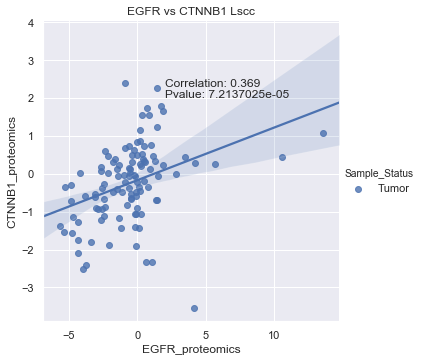

In [39]:
df1 = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CTN","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CTNNB1_proteomics", "Sample_Status",title = "EGFR vs CTNNB1 Lscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


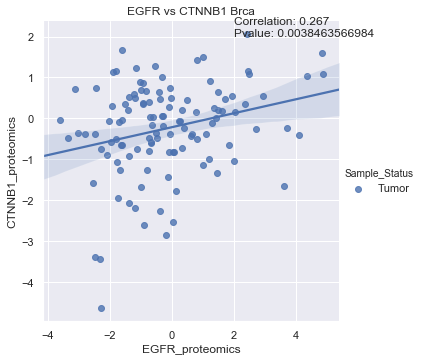

In [40]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CTNNB1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CTNNB1_proteomics", "Sample_Status",title = "EGFR vs CTNNB1 Brca", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


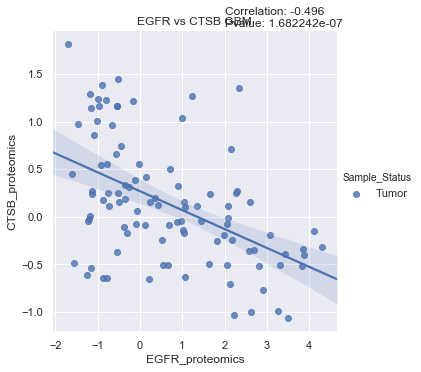

In [42]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CTSB","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CTSB_proteomics", "Sample_Status",title = "EGFR vs CTSB GBM", ra_stats = True, show_plot = True)

In [54]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
lscc = cptac.Lscc()

cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


In [57]:
# Returns a dataframe with proteomics and mutation type

def format_df(cancer_object, trans_gene):
    mut_type = cancer_object.get_genotype_all_vars("PTEN")
    
    if cancer_object is not l:
        # Keep only tumor samples from proteomics
        prot_and_mutations = cancer_object.join_omics_to_mutations(
            mutations_genes = ["EGFR"], omics_df_name = 'proteomics', omics_genes = trans_gene)
        prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
        
        # Reduce a multiindex 
        if isinstance(prot_and_mutations.keys(), pd.core.indexes.multi.MultiIndex):
            prot_and_mutations = cancer_object.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

        # Merge Mutation column from get_genotype_all_vars (includes cnv) with proteomics
        mut_type = mut_type[['Mutation']] 
        mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation_type"})
        prot_df = prot_and_mutations # Keep only proteomics
        merged = prot_df.join(mut_type)
    
    

    return merged


In [56]:
gene = 'EGFR'
t_gene = ['F3', "EGFR","F2R","PDGFA","VWF","PLAUR","MMP9","MMP2","MMP14","PLAU","CTSB","CDH1"]
g_del = format_df(brain, t_gene)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


Name,F3_proteomics,EGFR_proteomics,F2R_proteomics,PDGFA_proteomics,VWF_proteomics,PLAUR_proteomics,MMP9_proteomics,MMP2_proteomics,MMP14_proteomics,PLAU_proteomics,CTSB_proteomics,CDH1_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status,PTEN_Mutation_type
Patient_ID,,,,,,,,,,,,,,,,,
C3L-00104,-0.399432,1.054962,0.350246,-0.213744,-0.165231,0.102570,-0.024156,-0.154579,-0.404492,0.302882,0.104244,-0.550925,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion
C3L-00365,0.849939,2.219562,0.453416,-0.058804,-0.937662,-0.477721,0.321958,0.236139,-0.071744,-0.523207,-1.031788,0.462696,[Missense_Mutation],[p.G665D],Single_mutation,Tumor,Deletion
C3L-00674,-0.882370,0.137329,-0.145886,NaN,0.504777,-0.769331,2.599921,-0.190389,0.097343,-0.169179,0.418464,0.798808,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion
C3L-00677,-0.296643,-0.768478,-0.005618,-0.181194,-0.535926,-0.654874,1.456885,-0.537830,0.135347,-0.543071,-0.639756,-0.255133,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion
C3L-01040,0.617005,-1.249435,-0.125030,0.982043,1.210562,-0.780264,-0.830017,1.254198,-0.043874,-0.593203,-0.607268,-0.228912,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03183,-1.396911,0.356865,-0.347870,-0.990480,-0.108332,0.208843,-0.706972,1.095257,-0.137981,0.224057,0.201502,0.588516,[Missense_Mutation],[p.P596L],Single_mutation,Tumor,Deletion
C3N-03184,0.059024,1.623039,0.225372,-0.968799,0.394570,-1.236646,-0.202258,0.119959,0.591372,-0.686308,-0.496312,0.626089,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion
C3N-03186,0.562041,-0.381447,-0.060636,1.024882,0.721769,0.419209,0.810474,0.768317,0.313853,0.512889,-0.103044,-0.015307,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion


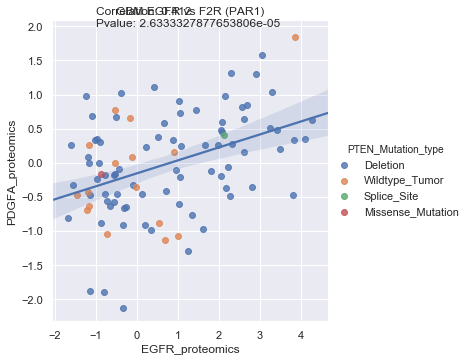

In [57]:

plot_lin_regression(g_del,"EGFR_proteomics","PDGFA_proteomics", "PTEN_Mutation_type",title = "GBM EGFR vs F2R (PAR1)", ra_stats = True, show_plot = True)


In [58]:
subtype = brain.get_derived_molecular()
subtype = subtype[["rna_wang_cancer_cell_2017"]]

subtype = subtype.rename(columns={"rna_wang_cancer_cell_2017": "GBM_Subtype"})
merged = pd.merge(g_del, subtype, on = "Patient_ID", how = "outer")
merged

#merged = merged.loc[merged['GBM_Subtype'] == "Classical"]
merged

Name,F3_proteomics,EGFR_proteomics,F2R_proteomics,PDGFA_proteomics,VWF_proteomics,PLAUR_proteomics,MMP9_proteomics,MMP2_proteomics,MMP14_proteomics,PLAU_proteomics,CTSB_proteomics,CDH1_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status,PTEN_Mutation_type,GBM_Subtype
Patient_ID,,,,,,,,,,,,,,,,,,
C3L-00104,-0.399432,1.054962,0.350246,-0.213744,-0.165231,0.102570,-0.024156,-0.154579,-0.404492,0.302882,0.104244,-0.550925,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion,Proneural
C3L-00365,0.849939,2.219562,0.453416,-0.058804,-0.937662,-0.477721,0.321958,0.236139,-0.071744,-0.523207,-1.031788,0.462696,[Missense_Mutation],[p.G665D],Single_mutation,Tumor,Deletion,Classical
C3L-00674,-0.882370,0.137329,-0.145886,NaN,0.504777,-0.769331,2.599921,-0.190389,0.097343,-0.169179,0.418464,0.798808,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion,Mesenchymal
C3L-00677,-0.296643,-0.768478,-0.005618,-0.181194,-0.535926,-0.654874,1.456885,-0.537830,0.135347,-0.543071,-0.639756,-0.255133,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion,Proneural
C3L-01040,0.617005,-1.249435,-0.125030,0.982043,1.210562,-0.780264,-0.830017,1.254198,-0.043874,-0.593203,-0.607268,-0.228912,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,Deletion,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-RN5K.N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT-RU72.N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT-UTHO.N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
plot_lin_regression(merged,"EGFR_proteomics","MMP2_proteomics", "GBM_Subtype",title = "GBM EGFR vs MMP2" , ra_stats = True, show_plot = True)


NameError: name 'merged' is not defined

In [49]:
gene = 'PTEN'
t_gene = ['F3', "EGFR","F2R","PDGFA"]
g_del = format_df(b, t_gene)
#g_del = g_del.loc[g_del['PTEN_Mutation'] == "Deletion" ]
g_del

NameError: name 'format_df' is not defined

In [257]:

plot_lin_regression(g_del,"EGFR_proteomics","PDGFA_proteomics", "PTEN_Mutation_type",title = "Brca EGFR vs F3 (TF)", ra_stats = True, show_plot = True)


ValueError: x and y must have length at least 2.

In [55]:
clin = b.get_clinical()

In [56]:
clin

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,Age.in.Month,Gender,Race,Human.Readable.Label,Experiment,Channel,Stage,PAM50,NMF.v2.1,ER,PR,ER.IHC.Score,PR.IHC.Score,Coring.or.Excision,Ischemia.Time.in.Minutes,Ischemia.Decade,Necrosis,Tumor.Cellularity,Total.Cellularity,In.CR,QC.status
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,NaN,NaN,black.or.african.american,CPT000814 0004,13,127C,Stage IIA,Basal,NaN,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass
CPT001846,CPT001846,Tumor,NaN,NaN,white,CPT001846 0005,12,128C,Stage III,Basal,NaN,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass
X01BR001,X01BR001,Tumor,660.0,female,black.or.african.american,[17]-af938b_D2,2,129N,Stage IIB,Basal,C4,negative,negative,0,0,coring,0.0,1.0,10.0,70.0,50.0,yes,QC.pass
X01BR008,X01BR008,Tumor,NaN,NaN,NaN,[cf]-467c39_D1,16,127C,NaN,Basal,C4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.0,60.0,no,QC.pass
X01BR009,X01BR009,Tumor,NaN,NaN,NaN,[0e]-051582_D1,16,127N,NaN,Basal,C4,negative,negative,NaN,NaN,NaN,NaN,NaN,0.0,80.0,70.0,no,QC.pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,X21BR001,Tumor,NaN,NaN,white,[1f]-d9108c,16,128N,NaN,LumB,C2,negative,negative,NaN,NaN,NaN,NaN,NaN,0.0,60.0,80.0,no,QC.pass
X21BR002,X21BR002,Tumor,NaN,NaN,white,[32]-22665e,16,128C,NaN,LumA,C2,positive,positive,NaN,NaN,NaN,NaN,NaN,0.0,65.0,60.0,no,QC.pass
X21BR010,X21BR010|X21BR010.REP1,Tumor,852.0,female,white,[68]-4d3e43_D2,3|17,129C|128C,Stage IIA,LumA,C1,positive,positive,3+,3+,excision,18.0,2.0,0.0,60.0,55.0,yes,QC.pass


In [48]:
clin

Name,Sample_Tumor_Normal,age,gender,height,weight,bmi,country_of_origin,race,ethnicity,ethnicity_self_identify,...,path_diag_to_death_days,cause_of_death,lost_to_follow_up,tumor_reoccur_after_treatment,path_diag_to_tumor_reoccur_days,expert_path_review,expert_path_review_num_segments,expert_path_review_details,excluded_in_downstream_analysis,exclusion_reason
Patient_ID,,,,,,,,,,,,,,,,,,,,,


In [49]:
pd.set_option('display.max_columns', None)

In [58]:
gene = 'EGFR'
t_gene = ['F3', "EGFR","F2R","PDGFA","VWF","PLAUR","MMP9","MMP2","MMP14","PLAU","CTSB","CDH1"]
g_del = format_df(b, t_gene)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: F2R, PDGFA (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


AttributeError: 'Brca' object has no attribute 'reduce_multiindex'

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


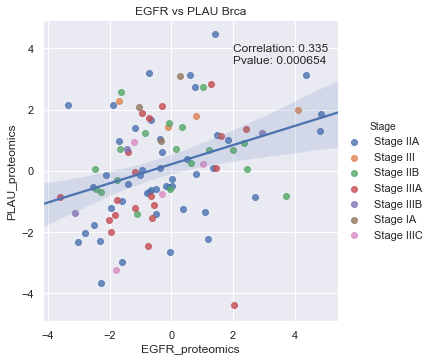

In [69]:
df1 = b.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
clin = b.get_clinical()
clin = clin[["Stage"]]
df1 = df1.join(clin)
df1
plot_lin_regression(df1,"EGFR_proteomics","PLAU_proteomics", "Stage",title = "EGFR vs PLAU Brca", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


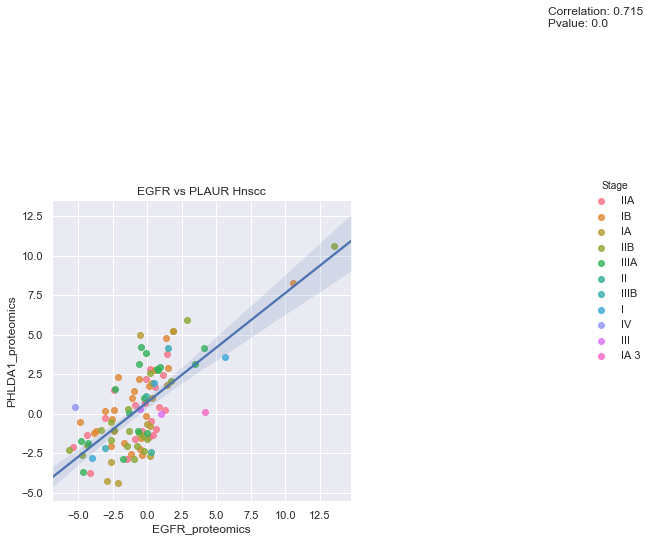

In [100]:
df1 = lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PHLDA1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
clin = lscc.get_clinical()
#clin = clin[["Stage"]]
df1 = df1.join(clin)

plot_lin_regression(df1,"EGFR_proteomics","PHLDA1_proteomics", "Stage",title = "EGFR vs PLAUR Hnscc", ra_stats = True, show_plot = True)

In [96]:
lscc.list_data()

Below are the dataframes contained in this dataset:
	clinical
		Dimensions: (216, 12)
	CNV
		Dimensions: (110, 19907)
	derived_molecular
		Dimensions: (212, 38)
	experimental_design
		Dimensions: (212, 3)
	gene_fusion
		Dimensions: (2591, 9)
	miRNA
		Dimensions: (191, 2408)
	phosphoproteomics
		Dimensions: (212, 42852)
	proteomics
		Dimensions: (212, 11295)
	somatic_mutation
		Dimensions: (30964, 3)
	transcriptomics
		Dimensions: (204, 21792)
